Order_ID            0.000000
Product_Category    4.752475
Product_Price       3.960396
Customer_Age        2.970297
Rating              4.950495
Review_Text         4.158416
Order_Date          1.980198
dtype: float64


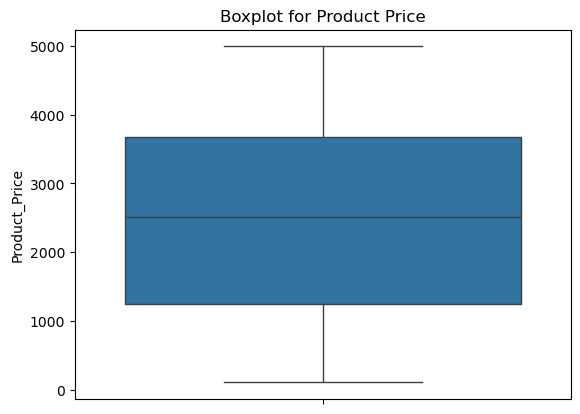

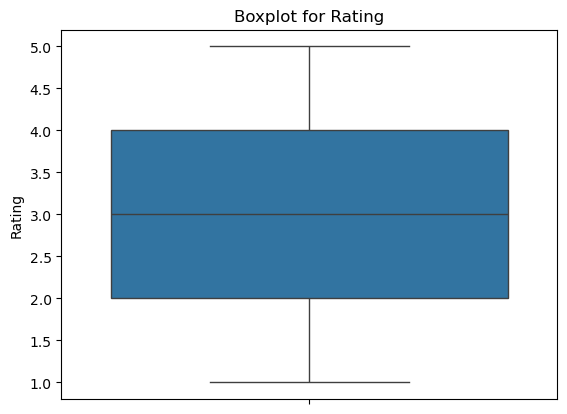

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          407 non-null    int64  
 1   Product_Category  407 non-null    int64  
 2   Product_Price     389 non-null    float64
 3   Customer_Age      407 non-null    float64
 4   Rating            407 non-null    float64
 5   Review_Text       407 non-null    object 
 6   Order_Date        400 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 25.4+ KB
None


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('/Users/kruthikasaisree/Downloads/Day 19_E-Commerce_Data.csv')

missing_data = df.isna().sum()
missing_percentage = (missing_data / len(df)) * 100
print(missing_percentage)

numerical_cols = ['Customer_Age', 'Rating']
imputer_num = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

df['Review_Text'] = df['Review_Text'].fillna('No review provided')
rating_imputer = SimpleImputer(strategy='most_frequent')
df['Rating'] = rating_imputer.fit_transform(df[['Rating']])

df = df.drop_duplicates(subset=['Review_Text', 'Rating', 'Customer_Age'])

df['Rating'] = df['Rating'].apply(lambda x: max(1, min(5, x)))

product_category_corrections = {
    'Electronics': 'Electronics',
    'HomeAppliances': 'Home Appliances',
    'Clothing': 'Clothing',
    'Footwear': 'Footwear',
    'BeautyProducts': 'Beauty Products'
}
df['Product_Category'] = df['Product_Category'].replace(product_category_corrections)

sns.boxplot(data=df['Product_Price'])
plt.title('Boxplot for Product Price')
plt.show()

sns.boxplot(data=df['Rating'])
plt.title('Boxplot for Rating')
plt.show()

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

remove_outliers(df, 'Product_Price')
remove_outliers(df, 'Rating')

label_encoder = LabelEncoder()
df['Product_Category'] = label_encoder.fit_transform(df['Product_Category'])

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['Review_Text'])

scaler = StandardScaler()
df[['Product_Price', 'Rating', 'Customer_Age']] = scaler.fit_transform(df[['Product_Price', 'Rating', 'Customer_Age']])

df.to_csv('cleaned_customer_reviews.csv', index=False)

print(df.info())
